# GAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari, load_cifar10



Using TensorFlow backend.


In [2]:
RUN_ID = '0016'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
label = 7
(x_train, y_train) = load_cifar10(label)
# (x_train, y_train) = load_safari('elephant')




## architecture

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


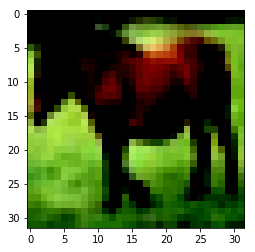

In [4]:
plt.imshow(x_train[0,:,:,:])

In [5]:
print(np.min(x_train))
print(np.max(x_train))

-1.0
1.0


In [6]:
x_train.shape

(5000, 32, 32, 3)

In [22]:
#works

gan = GAN(input_dim = (32,32,3)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'leaky_relu'
        , discriminator_dropout_rate = None
        , discriminator_learning_rate = 0.001
        , generator_initial_dense_layer_size = (8, 8, 128)
        , generator_use_upsampling = [True,True, False,False]
        , generator_conv_t_filters = [128,64, 64,3]
        , generator_conv_t_kernel_size = [5,5,5,5]
        , generator_conv_t_strides = [1,1,1,1]
        , generator_conv_t_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0001
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

#testing



gan = GAN(input_dim = (32,32,3)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'leaky_relu'
        , discriminator_dropout_rate = None
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (8, 8, 64)
        , generator_use_upsampling = [True,True, False,False]
        , generator_conv_t_filters = [128,64, 64,3]
        , generator_conv_t_kernel_size = [5,5,5,5]
        , generator_conv_t_strides = [1,1,1,1]
        , generator_conv_t_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

gan.save(RUN_FOLDER)




In [23]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [24]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 32, 32, 3)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 8, 8, 64)          102464    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 8, 8, 64)          0         
_________________________________________________________________
discriminator_conv_2 (Conv2D (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 4, 4, 128)         0         
__________

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [25]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 8192)              827392    
_________________________________________________________________
batch_normalization_29 (Batc (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 8192)              0         
_________________________________________________________________
reshape_7 (Reshape)          (None, 8, 8, 128)         0         
_________________________________________________________________
up_sampling2d_13 (UpSampling (None, 16, 16, 128)       0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 16, 16, 128)       409728    
__________

## training

In [26]:
d_losses, g_losses, d_accs, g_accs = gan.train(     
    x_train
    , batch_size = 128
    , epochs = 2000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
    , initial_epoch = 0
)



0 [D loss: 0.697934] [D acc: 0.437500] [G loss: 0.098444] [G acc: 1.000000]
1 [D loss: 2.610443] [D acc: 0.500000] [G loss: 2.406914] [G acc: 0.000000]
2 [D loss: 0.571848] [D acc: 0.753906] [G loss: 0.841384] [G acc: 0.390625]
3 [D loss: 6.148867] [D acc: 0.480469] [G loss: 2.515951] [G acc: 0.000000]
4 [D loss: 0.722893] [D acc: 0.605469] [G loss: 3.741087] [G acc: 0.000000]
5 [D loss: 2.285067] [D acc: 0.359375] [G loss: 1.329217] [G acc: 0.171875]
6 [D loss: 2.407302] [D acc: 0.273438] [G loss: 0.584004] [G acc: 1.000000]
7 [D loss: 0.684219] [D acc: 0.500000] [G loss: 0.672019] [G acc: 0.835938]
8 [D loss: 0.623252] [D acc: 0.558594] [G loss: 0.707142] [G acc: 0.351562]
9 [D loss: 0.561203] [D acc: 0.671875] [G loss: 0.894926] [G acc: 0.000000]
10 [D loss: 0.470784] [D acc: 0.945312] [G loss: 1.053017] [G acc: 0.000000]
11 [D loss: 0.475186] [D acc: 0.714844] [G loss: 1.612737] [G acc: 0.000000]
12 [D loss: 0.505667] [D acc: 0.722656] [G loss: 1.287866] [G acc: 0.000000]
13 [D los

107 [D loss: 0.505546] [D acc: 0.898438] [G loss: 0.868263] [G acc: 0.156250]
108 [D loss: 0.454988] [D acc: 0.781250] [G loss: 1.266657] [G acc: 0.031250]
109 [D loss: 0.523580] [D acc: 0.777344] [G loss: 0.700643] [G acc: 0.468750]
110 [D loss: 0.394341] [D acc: 0.824219] [G loss: 1.382184] [G acc: 0.023438]
111 [D loss: 0.469690] [D acc: 0.796875] [G loss: 0.055006] [G acc: 1.000000]
112 [D loss: 0.496523] [D acc: 0.707031] [G loss: 1.665652] [G acc: 0.007812]
113 [D loss: 0.863097] [D acc: 0.570312] [G loss: 0.361677] [G acc: 0.882812]
114 [D loss: 0.638652] [D acc: 0.554688] [G loss: 1.055856] [G acc: 0.007812]
115 [D loss: 0.624733] [D acc: 0.675781] [G loss: 0.834083] [G acc: 0.242188]
116 [D loss: 0.577207] [D acc: 0.687500] [G loss: 1.017167] [G acc: 0.015625]
117 [D loss: 0.565500] [D acc: 0.785156] [G loss: 0.457264] [G acc: 0.875000]
118 [D loss: 0.622664] [D acc: 0.546875] [G loss: 1.496791] [G acc: 0.031250]
119 [D loss: 0.769681] [D acc: 0.613281] [G loss: 0.544417] [G a

213 [D loss: 0.214431] [D acc: 0.917969] [G loss: 0.038530] [G acc: 1.000000]
214 [D loss: 0.226576] [D acc: 0.910156] [G loss: 1.066945] [G acc: 0.375000]
215 [D loss: 0.303083] [D acc: 0.867188] [G loss: 0.181660] [G acc: 0.953125]
216 [D loss: 0.817964] [D acc: 0.589844] [G loss: 1.634877] [G acc: 0.109375]
217 [D loss: 0.893197] [D acc: 0.609375] [G loss: 0.796394] [G acc: 0.390625]
218 [D loss: 0.580624] [D acc: 0.695312] [G loss: 2.392367] [G acc: 0.000000]
219 [D loss: 0.502289] [D acc: 0.812500] [G loss: 2.623125] [G acc: 0.000000]
220 [D loss: 0.447661] [D acc: 0.828125] [G loss: 1.221624] [G acc: 0.226562]
221 [D loss: 0.408206] [D acc: 0.800781] [G loss: 1.861094] [G acc: 0.140625]
222 [D loss: 0.544509] [D acc: 0.738281] [G loss: 0.187615] [G acc: 0.929688]
223 [D loss: 0.405946] [D acc: 0.835938] [G loss: 0.408015] [G acc: 0.796875]
224 [D loss: 0.357771] [D acc: 0.855469] [G loss: 0.182491] [G acc: 0.921875]
225 [D loss: 0.418945] [D acc: 0.816406] [G loss: 1.477808] [G a

319 [D loss: 1.001462] [D acc: 0.558594] [G loss: 2.870215] [G acc: 0.007812]
320 [D loss: 0.378907] [D acc: 0.839844] [G loss: 1.282198] [G acc: 0.210938]
321 [D loss: 0.293276] [D acc: 0.910156] [G loss: 2.309218] [G acc: 0.000000]
322 [D loss: 0.319772] [D acc: 0.859375] [G loss: 1.055961] [G acc: 0.445312]
323 [D loss: 0.353332] [D acc: 0.843750] [G loss: 1.817982] [G acc: 0.109375]
324 [D loss: 0.351565] [D acc: 0.851562] [G loss: 0.604175] [G acc: 0.718750]
325 [D loss: 0.240682] [D acc: 0.941406] [G loss: 1.302918] [G acc: 0.250000]
326 [D loss: 0.160443] [D acc: 0.949219] [G loss: 0.353829] [G acc: 0.851562]
327 [D loss: 0.264002] [D acc: 0.894531] [G loss: 6.241112] [G acc: 0.000000]
328 [D loss: 0.614136] [D acc: 0.765625] [G loss: 0.792200] [G acc: 0.507812]
329 [D loss: 0.760728] [D acc: 0.582031] [G loss: 3.691324] [G acc: 0.000000]
330 [D loss: 0.300875] [D acc: 0.859375] [G loss: 2.348533] [G acc: 0.000000]
331 [D loss: 0.216351] [D acc: 0.925781] [G loss: 1.872432] [G a

425 [D loss: 0.345954] [D acc: 0.847656] [G loss: 1.027698] [G acc: 0.320312]
426 [D loss: 0.236171] [D acc: 0.906250] [G loss: 0.448572] [G acc: 0.742188]
427 [D loss: 0.149729] [D acc: 0.960938] [G loss: 0.518831] [G acc: 0.718750]
428 [D loss: 0.105336] [D acc: 0.964844] [G loss: 0.475542] [G acc: 0.781250]
429 [D loss: 0.074312] [D acc: 0.972656] [G loss: 0.066338] [G acc: 0.984375]
430 [D loss: 0.065198] [D acc: 0.980469] [G loss: 0.325186] [G acc: 0.898438]
431 [D loss: 0.091200] [D acc: 0.976562] [G loss: 0.531951] [G acc: 0.742188]
432 [D loss: 0.089016] [D acc: 0.972656] [G loss: 0.020336] [G acc: 1.000000]
433 [D loss: 0.084389] [D acc: 0.984375] [G loss: 0.514958] [G acc: 0.773438]
434 [D loss: 0.170712] [D acc: 0.949219] [G loss: 0.287795] [G acc: 0.875000]
435 [D loss: 0.133006] [D acc: 0.960938] [G loss: 0.198962] [G acc: 0.914062]
436 [D loss: 0.163617] [D acc: 0.937500] [G loss: 1.157506] [G acc: 0.476562]
437 [D loss: 0.427610] [D acc: 0.812500] [G loss: 6.832118] [G a

531 [D loss: 0.114035] [D acc: 0.972656] [G loss: 0.305736] [G acc: 0.875000]
532 [D loss: 0.114174] [D acc: 0.957031] [G loss: 1.024525] [G acc: 0.523438]
533 [D loss: 0.061553] [D acc: 0.992188] [G loss: 0.752596] [G acc: 0.609375]
534 [D loss: 0.117497] [D acc: 0.964844] [G loss: 0.283955] [G acc: 0.882812]
535 [D loss: 0.141381] [D acc: 0.941406] [G loss: 12.344214] [G acc: 0.000000]
536 [D loss: 0.913648] [D acc: 0.726562] [G loss: 0.128462] [G acc: 0.976562]
537 [D loss: 0.899084] [D acc: 0.589844] [G loss: 4.163315] [G acc: 0.000000]
538 [D loss: 0.465835] [D acc: 0.796875] [G loss: 1.031731] [G acc: 0.390625]
539 [D loss: 0.536014] [D acc: 0.718750] [G loss: 3.699102] [G acc: 0.007812]
540 [D loss: 0.311904] [D acc: 0.878906] [G loss: 1.737850] [G acc: 0.140625]
541 [D loss: 0.226580] [D acc: 0.933594] [G loss: 1.430021] [G acc: 0.132812]
542 [D loss: 0.182167] [D acc: 0.941406] [G loss: 0.388126] [G acc: 0.812500]
543 [D loss: 0.118016] [D acc: 0.960938] [G loss: 0.116740] [G 

637 [D loss: 0.338601] [D acc: 0.886719] [G loss: 1.759636] [G acc: 0.015625]
638 [D loss: 0.348454] [D acc: 0.847656] [G loss: 0.988143] [G acc: 0.257812]
639 [D loss: 0.288804] [D acc: 0.871094] [G loss: 1.882991] [G acc: 0.007812]
640 [D loss: 0.305405] [D acc: 0.890625] [G loss: 3.087876] [G acc: 0.000000]
641 [D loss: 0.241055] [D acc: 0.921875] [G loss: 2.232852] [G acc: 0.007812]
642 [D loss: 0.178007] [D acc: 0.941406] [G loss: 2.705921] [G acc: 0.093750]
643 [D loss: 0.107706] [D acc: 0.984375] [G loss: 3.441033] [G acc: 0.007812]
644 [D loss: 0.154404] [D acc: 0.957031] [G loss: 5.060428] [G acc: 0.000000]
645 [D loss: 0.291740] [D acc: 0.890625] [G loss: 0.730620] [G acc: 0.593750]
646 [D loss: 0.893003] [D acc: 0.601562] [G loss: 3.624443] [G acc: 0.000000]
647 [D loss: 0.666798] [D acc: 0.687500] [G loss: 0.712263] [G acc: 0.500000]
648 [D loss: 0.683252] [D acc: 0.710938] [G loss: 1.852794] [G acc: 0.023438]
649 [D loss: 0.492122] [D acc: 0.761719] [G loss: 0.993705] [G a

743 [D loss: 0.099689] [D acc: 0.968750] [G loss: 3.066801] [G acc: 0.015625]
744 [D loss: 0.386504] [D acc: 0.828125] [G loss: 4.129186] [G acc: 0.000000]
745 [D loss: 0.553456] [D acc: 0.777344] [G loss: 0.611378] [G acc: 0.648438]
746 [D loss: 0.665542] [D acc: 0.617188] [G loss: 2.769614] [G acc: 0.015625]
747 [D loss: 0.365612] [D acc: 0.851562] [G loss: 0.827171] [G acc: 0.507812]
748 [D loss: 0.463849] [D acc: 0.738281] [G loss: 3.336588] [G acc: 0.000000]
749 [D loss: 0.586000] [D acc: 0.738281] [G loss: 0.762496] [G acc: 0.484375]
750 [D loss: 0.604793] [D acc: 0.675781] [G loss: 2.056925] [G acc: 0.015625]
751 [D loss: 0.412789] [D acc: 0.789062] [G loss: 1.176024] [G acc: 0.250000]
752 [D loss: 0.333051] [D acc: 0.890625] [G loss: 0.884342] [G acc: 0.515625]
753 [D loss: 0.290290] [D acc: 0.894531] [G loss: 1.579753] [G acc: 0.148438]
754 [D loss: 0.292813] [D acc: 0.886719] [G loss: 0.905299] [G acc: 0.500000]
755 [D loss: 0.307154] [D acc: 0.871094] [G loss: 2.095316] [G a

KeyboardInterrupt: 

In [20]:
idx = np.random.randint(0, x_train.shape[0], 128)
true_imgs = x_train[idx]

noise = np.random.normal(0, 1, (128, gan.z_dim))
gen_imgs = gan.generator.predict(noise)

x = np.concatenate([true_imgs, gen_imgs])
y = np.concatenate([np.ones((128,1)), np.zeros((128,1))])

In [21]:
d_loss, d_acc = gan.discriminator.train_on_batch(x, y)

In [22]:
d_loss

0.5897777

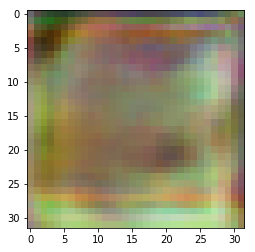

In [23]:
plt.imshow((x[200]+1)*0.5)

In [ ]:
y[200]

In [19]:
gan.discriminator.train_on_batch(x, y)

[0.7864815, 0.55078125]

In [ ]:
plt.plot(g_accs, color='orange', linewidth=1)
plt.plot(d_accs, color='green', linewidth=1)



In [16]:
for i in range(10):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

[0.99999976]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


(32, 32, 3)


array([4.5723013e-06], dtype=float32)

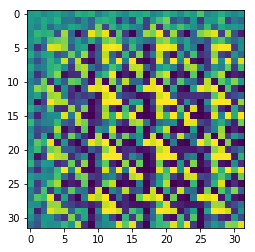

In [17]:
noise = np.random.normal(0, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(img[:,:,0])

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.model.summary()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [ ]:
gan.model.save_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))